In [9]:
import numpy as np
import matplotlib.pyplot as plt

import bruges as br
import modelling as md

grad10 = np.load('faultkernels/grad1_10_kernel.npy')
grad9 = np.load('faultkernels/grad1_9_kernel.npy')
grad8 = np.load('faultkernels/grad1_8_kernel.npy')
grad7 = np.load('faultkernels/grad1_7_kernel.npy')
grad6 = np.load('faultkernels/grad1_6_kernel.npy')
grad5 = np.load('faultkernels/grad1_5_kernel.npy')
grad4 = np.load('faultkernels/grad1_4_kernel.npy')
grad3 = np.load('faultkernels/grad1_3_kernel.npy')
grad2 = np.load('faultkernels/grad1_2_kernel.npy')
grad1 = np.load('faultkernels/grad1_1_kernel.npy')

neggrad10 = np.load('faultkernels/neggrad1_10_kernel.npy')
neggrad9 = np.load('faultkernels/neggrad1_9_kernel.npy')
neggrad8 = np.load('faultkernels/neggrad1_8_kernel.npy')
neggrad7 = np.load('faultkernels/neggrad1_7_kernel.npy')
neggrad6 = np.load('faultkernels/neggrad1_6_kernel.npy')
neggrad5 = np.load('faultkernels/neggrad1_5_kernel.npy')
neggrad4 = np.load('faultkernels/neggrad1_4_kernel.npy')
neggrad3 = np.load('faultkernels/neggrad1_3_kernel.npy')
neggrad2 = np.load('faultkernels/neggrad1_2_kernel.npy')
neggrad1 = np.load('faultkernels/neggrad1_1_kernel.npy')

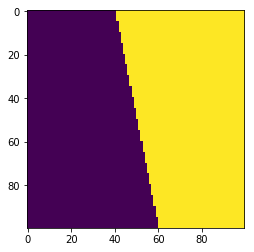

In [10]:
plt.imshow(grad5)

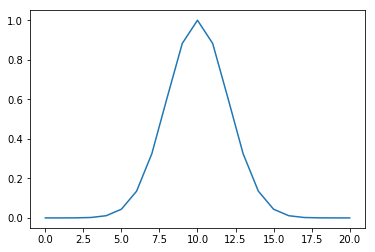

In [11]:
from scipy import signal

window = signal.gaussian(21, std=2)

plt.plot(window)

def build_synthetic(model, wavelet):
    
    '''Create reflectivity series from layers and convolve with a wavelet'''
    
    rc = np.diff(model, axis=0)
    
    synthetic = []

    for i in range(100):
    
        rt = rc[:,i]
    
        syn = np.convolve(rt, wavelet, mode='same')
    
        synthetic.append(syn)
    
    synthetic = np.stack(synthetic, axis=1)
    
    return synthetic * -1

In [126]:
syn = build_synthetic(neggrad10, window)


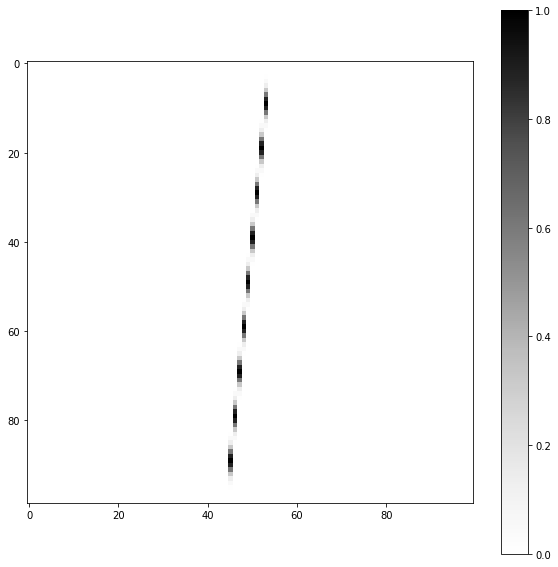

In [127]:
plt.figure(figsize=(10,10))
plt.imshow(syn, cmap='Greys')
plt.colorbar()

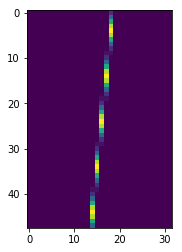

In [128]:
cut  = syn[25:73,33:65]
plt.imshow(cut)

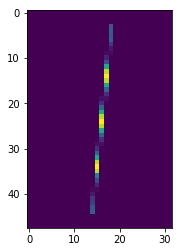

In [129]:
cut[:3,:]= cut[:3,:] *0
cut[3:6,:]= cut[3:6,:] *0.3
cut[6:9,:]= cut[6:9,:] *0.5
cut[9:12,:]= cut[9:12,:] *0.7

cut[36:39,:]= cut[36:39,:] *0.7
cut[39:42,:]= cut[39:42,:] *0.5
cut[42:45,:]= cut[42:45,:] *0.3
cut[45:,:]= cut[45:,:] *0
plt.imshow(cut)

In [130]:
%pwd

'/home/billy/Dropbox/Python/projects/faults'

In [131]:
np.save(arr=cut, allow_pickle=False, file='gaussians/neggrad10')